In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/tkseneee/Dataset/master/k_circle_sales.csv')

In [3]:
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3


In [ ]:
#3735.1380 Rs is generated by selling an Item FDA15 at the Outlet OUT049

In [4]:
# CEntral Tendency Measures

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7774 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       6473 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Profit                     8523 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage:

In [9]:
data['Outlet_Establishment_Year']=data['Outlet_Establishment_Year'].astype('object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7774 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   object 
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       6473 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Profit                     8523 non-null   float64
dtypes: float64(5), object(8)
memory usage: 865.7+ KB

In [5]:
# Mean
data.mean()

Item_Weight                    11.676740
Item_Visibility                 0.066132
Item_MRP                      140.998838
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
Profit                         13.414514
dtype: float64

In [12]:
num_data=data.select_dtypes(include=np.number)
num_data.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit
0,9.30,0.016047,249.8,3735.1380,11.5
1,5.92,0.019278,48.3,443.4228,14.3


In [13]:
cat_data=data.select_dtypes(exclude=np.number)
cat_data.head(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,1999,Medium,Tier 2,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,2009,Medium,Tier 2,Supermarket Type2


In [14]:
num_data.mean()

Item_Weight            11.676740
Item_Visibility         0.066132
Item_MRP              140.998838
Item_Outlet_Sales    2181.288914
Profit                 13.414514
dtype: float64

In [15]:
# The average MRP value of the Items sold in this dataset is 140 Rs
# The average Sales value generated by selling the Items across all the outlet is 2181 Rs

In [ ]:
# Whenever extreeme values (outlier) are exist, then mean is not a trustable measure. 

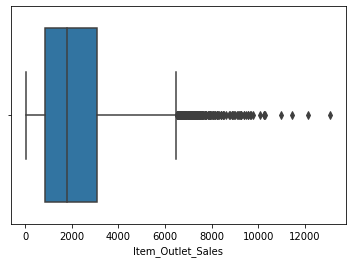

In [17]:
sb.boxplot(num_data['Item_Outlet_Sales'])

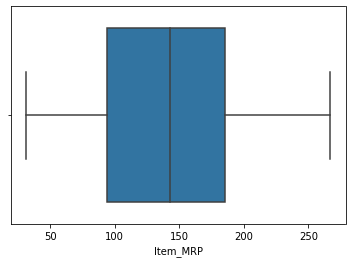

In [19]:
sb.boxplot(num_data['Item_MRP'])

In [20]:
num_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit
count,7774.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,11.676740,0.066132,140.998838,2181.288914,13.414514
std,5.776851,0.051598,62.258099,1706.499616,1.701840
min,0.000000,0.000000,31.300000,33.290000,0.100000
25%,7.720000,0.026989,93.800000,834.247400,13.150000
50%,11.800000,0.053931,142.700000,1794.331000,13.900000
75%,16.500000,0.094585,185.650000,3101.296400,14.300000
max,21.350000,0.328391,266.900000,13086.964800,24.000000


In [22]:
print(num_data['Item_Outlet_Sales'].mean())
print(num_data['Item_Outlet_Sales'].median())

2181.2889135750365
1794.3310000000001


In [23]:
import scipy.stats as stats

In [24]:
tri_me=stats.trim_mean(num_data['Item_Outlet_Sales'],proportiontocut=0.1)

In [27]:
tri_me

1971.326787710808

In [28]:
tri=stats.trimboth(num_data['Item_Outlet_Sales'],proportiontocut=0.1)

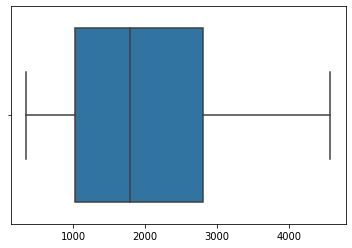

In [30]:
sb.boxplot(tri)

In [31]:
res=pd.DataFrame()

In [32]:
res['Mean']=num_data.mean()

In [35]:
res['Trim_mean']=stats.trim_mean(num_data,proportiontocut=0.1)

In [37]:
res['Median']=num_data.median()

In [38]:
res

,Mean,Trim_mean,Median
Item_Weight,11.676740,12.892137,11.800000
Item_Visibility,0.066132,0.060344,0.053931
Item_MRP,140.998838,139.706731,142.700000
Item_Outlet_Sales,2181.288914,1971.326788,1794.331000
Profit,13.414514,13.744640,13.900000


In [ ]:
# Quartiles
#25 percentile value (Q1) is 65 for Chennai
#25 percentile value (Q1) is 40 for Gurgoan

#75 percentile value for Bangalore is 95 -- 25 percent of students scored more than 95 marks

In [41]:
perct=num_data.quantile([0.1,0.25,0.5,0.75,0.9]).T

In [46]:
res=pd.concat([res,perct],axis=1)

In [47]:
res

,Mean,Trim_mean,Median,0.1,0.25,0.5,0.75,0.9
Item_Weight,11.676740,12.892137,11.800000,5.110000,7.720000,11.800000,16.500000,19.250000
Item_Visibility,0.066132,0.060344,0.053931,0.012042,0.026989,0.053931,0.094585,0.139514
Item_MRP,140.998838,139.706731,142.700000,52.800000,93.800000,142.700000,185.650000,231.200000
Item_Outlet_Sales,2181.288914,1971.326788,1794.331000,343.552800,834.247400,1794.331000,3101.296400,4570.051200
Profit,13.414514,13.744640,13.900000,11.800000,13.150000,13.900000,14.300000,14.600000


In [ ]:
# Measure of Dispersion / Deviations
# age --- 
#deviation of 30 units
#50 -- 20 to 80

# Salary
#deviation of 100 units
# 30000 -- 29900 to 30100

# Deviations --- Range, Variance, Standard deviation, coeff of variance, IQR

In [48]:
res

,Mean,Trim_mean,Median,0.1,0.25,0.5,0.75,0.9
Item_Weight,11.676740,12.892137,11.800000,5.110000,7.720000,11.800000,16.500000,19.250000
Item_Visibility,0.066132,0.060344,0.053931,0.012042,0.026989,0.053931,0.094585,0.139514
Item_MRP,140.998838,139.706731,142.700000,52.800000,93.800000,142.700000,185.650000,231.200000
Item_Outlet_Sales,2181.288914,1971.326788,1794.331000,343.552800,834.247400,1794.331000,3101.296400,4570.051200
Profit,13.414514,13.744640,13.900000,11.800000,13.150000,13.900000,14.300000,14.600000


In [49]:
num_data['Profit'].quantile(0.05)

10.5

In [50]:
num_data['Profit'].quantile(0.01)
# only 1 percentage of items are giving the profit less than 5.7 percentage

5.7

In [53]:
num_data[num_data['Profit']<5.7]

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit
217,13.65,0.134976,260.1,260.9936,3.2
320,0.00,0.042087,122.4,5448.9072,0.2
457,20.25,0.102724,93.2,1957.4520,2.7
602,20.85,0.000000,115.2,1054.6272,1.7
716,17.35,0.146896,149.6,3745.1250,5.2
...,...,...,...,...,...
7948,9.30,0.042531,125.5,2848.2924,5.3
8074,15.60,0.045056,242.4,2416.8540,0.2
8099,0.00,0.138777,147.5,5219.8720,4.1
8429,19.75,0.018020,181.6,2876.2560,4.1


In [55]:
# Measure of Dispersion
# Range
num_data.max()-num_data.min()

Item_Weight             21.350000
Item_Visibility          0.328391
Item_MRP               235.600000
Item_Outlet_Sales    13053.674800
Profit                  23.900000
dtype: float64

In [ ]:
# Variance
# Sum[((Xi-X_mean)^2)] / N

In [61]:
((num_data['Item_Outlet_Sales']-num_data['Item_Outlet_Sales'].mean())**2).mean()

2911799.2582300343

In [62]:
num_data.var()

Item_Weight          3.337201e+01
Item_Visibility      2.662335e-03
Item_MRP             3.876071e+03
Item_Outlet_Sales    2.912141e+06
Profit               2.896258e+00
dtype: float64

In [63]:
# Standard Deviation
np.sqrt(((num_data['Item_Outlet_Sales']-num_data['Item_Outlet_Sales'].mean())**2).mean())

1706.3995013565946

In [64]:
num_data.std()

Item_Weight             5.776851
Item_Visibility         0.051598
Item_MRP               62.258099
Item_Outlet_Sales    1706.499616
Profit                  1.701840
dtype: float64

In [ ]:
# Always a good practice is to give both mean and its standard deviation to the client

In [65]:
num_data['Item_Visibility'].mean()

0.06613202877895127

In [66]:
#Coefficient of Variance = std/mean
num_data.std()/num_data.mean()

Item_Weight          0.494732
Item_Visibility      0.780224
Item_MRP             0.441550
Item_Outlet_Sales    0.782335
Profit               0.126866
dtype: float64

In [ ]:
# What is your understanding if std = 0

In [67]:
# IQR - Inter Quartile Range
num_data.quantile(0.75)-num_data.quantile(0.25)

Item_Weight             8.780000
Item_Visibility         0.067596
Item_MRP               91.850000
Item_Outlet_Sales    2267.049000
Profit                  1.150000
dtype: float64

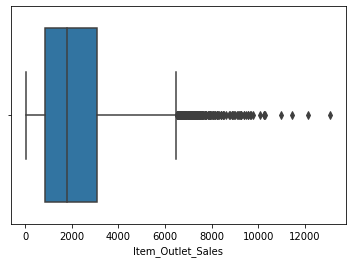

In [68]:
# How many outliers are there in Item_Outlet_Sales ?
sb.boxplot(num_data['Item_Outlet_Sales'])

In [73]:
i='Item_Outlet_Sales'
q3=num_data[i].quantile(0.75)
q1=num_data[i].quantile(0.25)
iqr=q3-q1
ub=q3+1.5*iqr
lb=q1-1.5*iqr

outli_data=num_data[((num_data[i]>ub) | (num_data[i]<lb))]
normal_data=num_data[~((num_data[i]>ub) | (num_data[i]<lb))]

In [75]:
print(normal_data.shape)
print(outli_data.shape)

(8337, 5)
(186, 5)


In [78]:
# Univariate measures for categorical data
cat_data.nunique()

Item_Identifier              1559
Item_Fat_Content                5
Item_Type                      16
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            8
Outlet_Type                     4
dtype: int64

In [82]:
for i in cat_data.columns:
    print(i)
    print(cat_data[i].unique())
    print('////////////////')

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
////////////////
Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
////////////////
Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
////////////////
Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
////////////////
Outlet_Establishment_Year
[1999 2009 1998 1987 1985 2002 2007 1997 2004]
////////////////
Outlet_Size
['Medium' nan 'High' 'Small']
////////////////
Outlet_Location_Type
['Tier 2' nan 'Tier 3' '  --' 'Tier1' 'na' '  -' '?' 'NAN']
////////////////
Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
////////////////


In [91]:
for i in cat_data.columns:
    print(cat_data[i].value_counts(normalize=True))
    print('////////////////')

FDW13    0.001173
FDG33    0.001173
FDV60    0.001056
FDO19    0.001056
FDW26    0.001056
           ...   
DRF48    0.000117
FDT35    0.000117
FDO33    0.000117
FDN52    0.000117
FDY43    0.000117
Name: Item_Identifier, Length: 1559, dtype: float64
////////////////
Low Fat    0.597090
Regular    0.338965
LF         0.037076
reg        0.013728
low fat    0.013141
Name: Item_Fat_Content, dtype: float64
////////////////
Fruits and Vegetables    0.144550
Snack Foods              0.140795
Household                0.106770
Frozen Foods             0.100434
Dairy                    0.080019
Canned                   0.076147
Baking Goods             0.076030
Health and Hygiene       0.061011
Soft Drinks              0.052212
Meat                     0.049865
Breads                   0.029450
Hard Drinks              0.025109
Others                   0.019829
Starchy Foods            0.017365
Breakfast                0.012906
Seafood                  0.007509
Name: Item_Type, dtype: float64
/

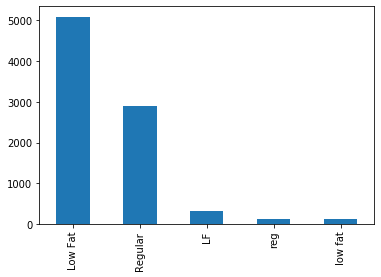

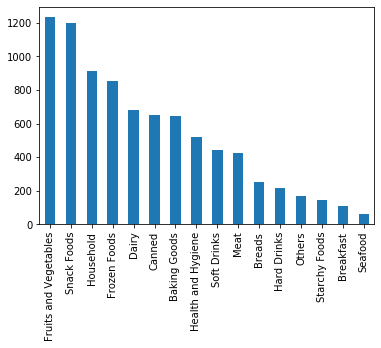

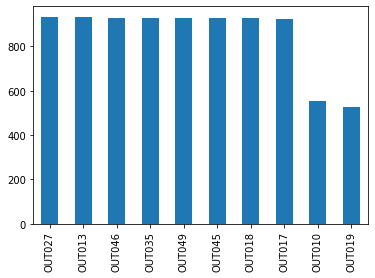

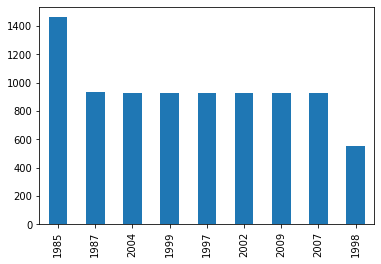

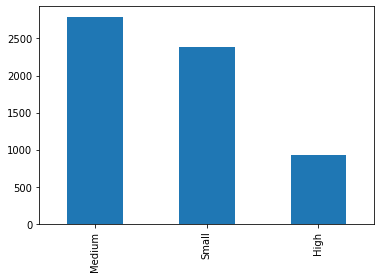

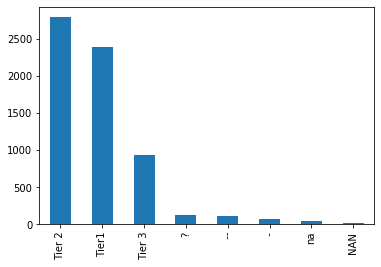

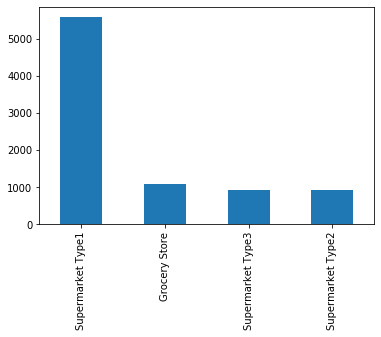

In [86]:
for i in cat_data.columns[1:]:
    (cat_data[i].value_counts()).plot(kind='bar')
    plt.show()

In [88]:
len(cat_data['Item_Type'].unique())

16

In [92]:
cat_data['Item_Fat_Content'].mode()

0    Low Fat
dtype: object

In [93]:
cat_data['Item_Identifier'].mode()

0    FDG33
1    FDW13
dtype: object

In [94]:
cat_data['Item_Identifier'].value_counts().head(5)

FDW13    10
FDG33    10
FDV60     9
FDO19     9
FDW26     9
Name: Item_Identifier, dtype: int64

In [90]:
cat_data.mode()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDG33,Low Fat,Fruits and Vegetables,OUT027,1985,Medium,Tier 2,Supermarket Type1
1,FDW13,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 100 Employee
# 51 - male
# 49 - female
# Mode - male

In [95]:
#Bivariate
#Num Vs Num
# Covariance(x,y) => sum[(Xi-X_mean)*(Yi-Y_mean)]/N

num_data.cov()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit
Item_Weight,33.372008,-0.016030,7.425851,-3.295708e+02,-0.160196
Item_Visibility,-0.016030,0.002662,-0.005131,-1.132561e+01,0.001253
Item_MRP,7.425851,-0.005131,3876.070885,6.029901e+04,0.435364
Item_Outlet_Sales,-329.570782,-11.325611,60299.006078,2.912141e+06,2.762921
Profit,-0.160196,0.001253,0.435364,2.762921e+00,2.896258


In [100]:
num_data.var().round(3)

Item_Weight               33.372
Item_Visibility            0.003
Item_MRP                3876.071
Item_Outlet_Sales    2912140.938
Profit                     2.896
dtype: float64

In [ ]:
# cov limit -inf to +inf

In [ ]:
# corr(X,Y) = cov(X,y)/sd(x)*sd(y)
# corr limit --> -1 to 1

In [101]:
num_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit
Item_Weight,1.000000,-0.055081,0.020616,-0.034997,-0.016058
Item_Visibility,-0.055081,1.000000,-0.001597,-0.128625,0.014269
Item_MRP,0.020616,-0.001597,1.000000,0.567555,0.004109
Item_Outlet_Sales,-0.034997,-0.128625,0.567555,1.000000,0.000951
Profit,-0.016058,0.014269,0.004109,0.000951,1.000000


In [103]:
num_data.corr(method='spearman')

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit
Item_Weight,1.000000,-0.031204,0.025524,0.012541,-0.015293
Item_Visibility,-0.031204,1.000000,0.005339,-0.115076,-0.005699
Item_MRP,0.025524,0.005339,1.000000,0.562981,0.005998
Item_Outlet_Sales,0.012541,-0.115076,0.562981,1.000000,0.018696
Profit,-0.015293,-0.005699,0.005998,0.018696,1.000000


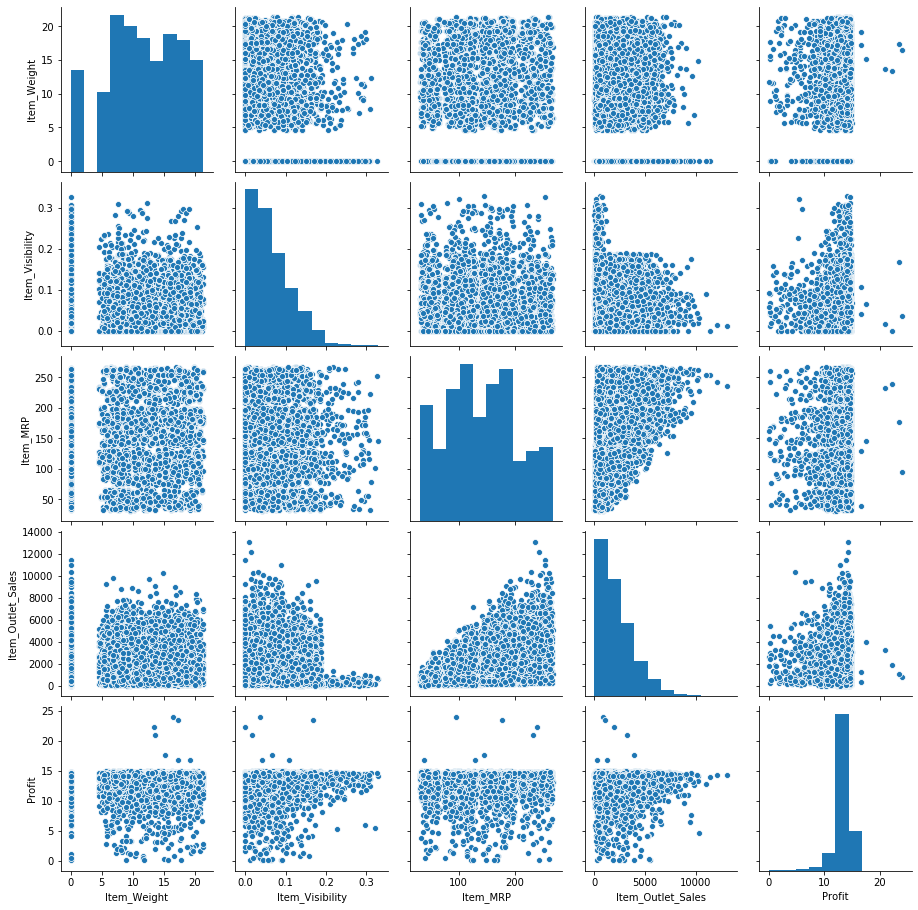

In [104]:
sb.pairplot(num_data)

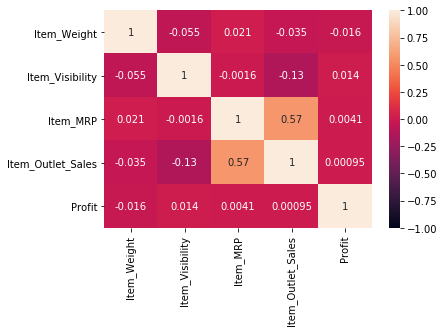

In [107]:
sb.heatmap(num_data.corr(),annot=True,vmin=-1,vmax=1)

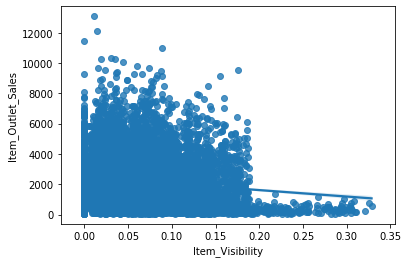

In [109]:
sb.regplot(num_data['Item_Visibility'],num_data['Item_Outlet_Sales'])